### Dimension Reduction Analysis

Reproducing results from MPH2009

Create a dataframe containing the results from running:
* All specified datasets
* Group of algorithms
* Choice of quality measures

Then producing results as tables and visualizations.

In [2]:
import itertools
import pandas as pd
from functools import partial

from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding

from MulticoreTSNE import MulticoreTSNE as TSNE
from umap import UMAP

import src
import src.data.datasets as datasets
from src.visualization.plotting import two_dim_multiplot, embeddable_image
import src.quality_measures as qm
from src.paths import processed_data_path
from src.data.experiment import run_algorithm

import logging

LOG_FORMAT = "%(levelname)s %(asctime)s - %(message)s"
DATE_FORMAT = "%m/%d/%Y %I:%M:%S %p"

logging.basicConfig(format=LOG_FORMAT, datefmt=DATE_FORMAT, level=logging.INFO) 
logger = logging.getLogger()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
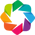

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import holoviews as hv
hv.extension('bokeh', 'matplotlib')
%opts Curve Scatter Bars [tools=['hover']]
%matplotlib inline
sns.set_context('poster')
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# location to save data
if not processed_data_path.exists():
    os.makedirs(processed_data_path)

## Specify datasets

In [6]:
ds_names = [
 'broken-swiss-roll',
 'coil-20',
 'difficult',
 'helix',
 'hiva',
 'mnist',
 'orl-faces',
 'swiss-roll',
 'twinpeaks']

In [7]:
ds_names = [
 'broken-swiss-roll',
 'difficult',
 'helix',
 'swiss-roll',
 'twinpeaks'   
]

In [8]:
len(ds_names)

5

In [9]:
assert all([ds_name in datasets.available_datasets() for ds_name in ds_names])

## Choose algorithms and parameters

In [10]:
low_dimension = 2
random_state = 6502
metric = 'euclidean' # for all the current datasets euclidean should be fine

In [11]:
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.decomposition import KernelPCA

In [12]:
algorithms = {'PCA' : PCA(n_components=low_dimension, svd_solver='arpack'),
              'KernelPCA': KernelPCA(n_components=low_dimension, kernel='poly', degree=5),
              #'MDS' : MDS(n_components=low_dimension, metric=True),
              'LLE': LocallyLinearEmbedding(n_components=low_dimension, n_neighbors=10),
              'HLLE': LocallyLinearEmbedding(n_components=low_dimension, method='hessian',
                                             n_neighbors=10, eigen_solver='dense'),
              'LaplacianEigenmaps': SpectralEmbedding(n_components=low_dimension, n_neighbors=10),
              'tSNE' : TSNE(n_components=low_dimension),
              'Isomap' : Isomap(n_components=low_dimension, n_neighbors=10),
              'UMAP' : UMAP(n_components=low_dimension, metric=metric, random_state=random_state),
             }

## Run all algorithms on all datasets and turn the results into a dataframe

Note that some dataset-algorithm combos are unfeasible (list MDS on MNIST).

In [13]:
low_data = {}
metadata = {}
for dataset_name in ds_names:
    dataset = datasets.load_dataset(dataset_name)
    low_data[dataset_name] = {}
    for name, algorithm in algorithms.items():
        logger.info(f"Starting {name} on {dataset_name}")
        try:
            low_data[dataset_name][name] = run_algorithm(dataset, algorithm_object=algorithms[name],
                                               algorithm_name=name, data_path=processed_data_path)
        except Exception as e:
            print(f"Cannot complete {dataset_name}, {name} combination: {e}")
            pass

INFO 08/03/2018 02:16:01 PM - Starting PCA on broken-swiss-roll
INFO 08/03/2018 02:16:01 PM - Experiment has already been run. Returning Cached Result
INFO 08/03/2018 02:16:01 PM - Starting KernelPCA on broken-swiss-roll
INFO 08/03/2018 02:16:01 PM - Experiment has already been run. Returning Cached Result
INFO 08/03/2018 02:16:01 PM - Starting LLE on broken-swiss-roll
INFO 08/03/2018 02:16:01 PM - Experiment has already been run. Returning Cached Result
INFO 08/03/2018 02:16:01 PM - Starting HLLE on broken-swiss-roll
INFO 08/03/2018 02:16:01 PM - Experiment has already been run. Returning Cached Result
INFO 08/03/2018 02:16:01 PM - Starting LaplacianEigenmaps on broken-swiss-roll
INFO 08/03/2018 02:16:01 PM - Experiment has already been run. Returning Cached Result
INFO 08/03/2018 02:16:01 PM - Starting tSNE on broken-swiss-roll
INFO 08/03/2018 02:16:01 PM - Experiment has already been run. Returning Cached Result
INFO 08/03/2018 02:16:01 PM - Starting Isomap on broken-swiss-roll
INFO

# Choose quality scores

In [14]:
k = 12

In [15]:
scores = {
    'Strain':(qm.point_strain, qm.strain),
    'Stress':(qm.point_stress, qm.stress),
    'Trustworthiness':(partial(qm.point_untrustworthiness, n_neighbors=k),
                       partial(qm.trustworthiness, n_neighbors=k)),
    'Continuity':(partial(qm.point_discontinuity, n_neighbors=k),
                  partial(qm.continuity, n_neighbors=k))
}

In [16]:
# Do all the quality scores. Eventually add caching into the qm module itself.

In [17]:
high_distances = {}
for dataset_name in ds_names:
    dataset = datasets.load_dataset(dataset_name)
    high_distances[dataset_name] = pairwise_distances(dataset.data, metric=metric)

In [18]:
# make this a double loop instead...to match

In [19]:
%%time
low_distances_dict = {}
for ds_name in ds_names:
    for alg_name in algorithms.keys():
        try:
            _, low_distances, _ = qm.pairwise_distance_differences(high_distances=high_distances[ds_name],
                                                                   low_data=low_data[ds_name][alg_name].data,
                                                                   metric=metric)
            low_distances_dict[f"{ds_name}_{alg_name}"] = low_distances
        except:
            pass

CPU times: user 13.5 s, sys: 11.1 s, total: 24.7 s
Wall time: 21.8 s


In [20]:
## This is slow-ish. Do some profiling.

In [21]:
total_scores_dict = {}
point_scores_dict = {}
for ds_name in ds_names:
    logger.info(ds_name)
    total_scores_dict[ds_name] = {}
    point_scores_dict[ds_name] = {}
    for alg_name in algorithms.keys():
        logger.info(alg_name)
        total_scores_dict[ds_name][alg_name] = {}
        point_scores_dict[ds_name][alg_name] = {}
        for score_name, score_fcns in scores.items():
            logger.info(score_name)
            key = f"{ds_name}_{alg_name}"
            try:
                point_score = score_fcns[0](high_distances=high_distances[ds_name],
                                            low_distances=low_distances_dict[key])
                total_score = score_fcns[1](high_distances=high_distances[ds_name],
                                            low_distances=low_distances_dict[key])
                total_scores_dict[ds_name][alg_name][score_name] = total_score
                point_scores_dict[ds_name][alg_name][score_name] = point_score
            except:
                pass

INFO 08/03/2018 02:16:26 PM - broken-swiss-roll
INFO 08/03/2018 02:16:26 PM - PCA
INFO 08/03/2018 02:16:26 PM - Strain
INFO 08/03/2018 02:16:26 PM - Stress
INFO 08/03/2018 02:16:26 PM - Trustworthiness
INFO 08/03/2018 02:16:27 PM - Continuity
INFO 08/03/2018 02:16:27 PM - KernelPCA
INFO 08/03/2018 02:16:27 PM - Strain
INFO 08/03/2018 02:16:28 PM - Stress
INFO 08/03/2018 02:16:28 PM - Trustworthiness
INFO 08/03/2018 02:16:28 PM - Continuity
INFO 08/03/2018 02:16:29 PM - LLE
INFO 08/03/2018 02:16:29 PM - Strain
INFO 08/03/2018 02:16:29 PM - Stress
INFO 08/03/2018 02:16:29 PM - Trustworthiness
INFO 08/03/2018 02:16:30 PM - Continuity
INFO 08/03/2018 02:16:30 PM - HLLE
INFO 08/03/2018 02:16:30 PM - Strain
INFO 08/03/2018 02:16:31 PM - Stress
INFO 08/03/2018 02:16:31 PM - Trustworthiness
INFO 08/03/2018 02:16:31 PM - Continuity
INFO 08/03/2018 02:16:32 PM - LaplacianEigenmaps
INFO 08/03/2018 02:16:32 PM - Strain
INFO 08/03/2018 02:16:32 PM - Stress
INFO 08/03/2018 02:16:32 PM - Trustworthin

In [22]:
# Note: tried doing this straight to a df once, and it was a nightmare

In [23]:
# point scores df

In [24]:
df_dict = {}
for ds_name in ds_names:
    ds_df = pd.DataFrame(columns=list(scores.keys())+['algorithm', 'item'])
    for alg_name in algorithms.keys():
        df = pd.DataFrame(point_scores_dict[ds_name][alg_name])
        df['algorithm'] = alg_name
        df['item'] = df.index.astype(int)
        ds_df = pd.concat([ds_df, df], sort=True)
    df_dict[ds_name] = ds_df

In [25]:
# merge it in with the dimension reduction data

In [26]:
ds_df_dict = {}
for ds_name in ds_names:
    df = pd.DataFrame(columns=['x', 'y', 'target', 'rotation', 'filename', 'algorithm', 'item'])
    for name, v in low_data[ds_name].items():
        i_df = pd.DataFrame()
        for i, axis in enumerate(['x', 'y']):
            i_df[f'{axis}'] = v['data'][:, i]
        i_df['target'] = v['target']
        i_df['rotation'] = v['metadata'].get('rotation', pd.np.NAN)
        i_df['filename'] = v['metadata'].get('filename', pd.np.NAN)
        i_df['algorithm'] = name
        i_df['item'] = i_df.index
        df = df.append(i_df, ignore_index=True)
    df.shape
    df['target'] = df['target']
    df['item'] = df['item'].astype(int)
    df_dict[ds_name]['item'] = df_dict[ds_name]['item'].astype(int)
    df = df.merge(df_dict[ds_name], on=['item', 'algorithm'])
    ds_df_dict[ds_name] = df

In [27]:
## TODO: make visualizations out of ds_df_dict

## Create summary results df

In [28]:
pd.set_option('max_colwidth',60)
pd.set_option('precision',4)

In [29]:
total_df = pd.DataFrame(columns=['dataset'])
for ds_name in ds_names:
        df = pd.DataFrame(total_scores_dict[ds_name])
        df['dataset'] = ds_name
        total_df = pd.concat([total_df, df], sort=True)
total_df = total_df[['dataset'] + list(algorithms.keys())]

In [30]:
total_df[total_df.dataset == ds_name]

dataset        PCA  KernelPCA        LLE       HLLE  \
Continuity       twinpeaks     0.9961     0.9939     0.9984     0.4778   
Strain           twinpeaks     3.6677     9.7994     1.0013     1.0018   
Stress           twinpeaks  1227.0900  2274.5564  4157.9246  4260.6540   
Trustworthiness  twinpeaks     0.9387     0.9392     0.9959     0.4718   

                 LaplacianEigenmaps         tSNE     Isomap        UMAP  
Continuity                   0.9599       0.9984     0.9993      0.9979  
Strain                       1.0112    3390.3791     6.2946    225.2533  
Stress                    3943.0496  113445.0013  1055.3007  26158.3107  
Trustworthiness              0.9660       0.9993     0.9990      0.9990

In [31]:
total_df.loc[total_df.index == 'Strain']

dataset     PCA   KernelPCA     LLE    HLLE  \
Strain  broken-swiss-roll  4.0522  9.3078e+08  1.0000  1.0000   
Strain          difficult  3.8068  1.3996e+01  1.0003  1.0002   
Strain              helix  4.2561  9.9473e+01  1.0002  1.0007   
Strain         swiss-roll  3.7524  8.8600e+08  1.0000  1.0000   
Strain          twinpeaks  3.6677  9.7994e+00  1.0013  1.0018   

        LaplacianEigenmaps       tSNE   Isomap       UMAP  
Strain              1.0002    16.8841   5.9800     4.3790  
Strain              1.0008  4036.2924   7.0057  1080.1822  
Strain              1.0057   365.4864  43.0831   122.6425  
Strain              1.0001    15.4283  31.9286     2.5558  
Strain              1.0112  3390.3791   6.2946   225.2533

In [32]:
total_df.loc[total_df.index == 'Stress']

dataset        PCA   KernelPCA         LLE        HLLE  \
Stress  broken-swiss-roll  2970.4602  1.7996e+08  15154.5759  15155.3833   
Stress          difficult  3887.8669  7.8096e+03  11634.2366  11624.8793   
Stress              helix   329.5752  1.1850e+04   3187.1215   3163.7942   
Stress         swiss-roll  4205.9874  1.7176e+08  16092.0865  16089.4508   
Stress          twinpeaks  1227.0900  2.2746e+03   4157.9246   4260.6540   

        LaplacianEigenmaps         tSNE      Isomap         UMAP  
Stress          15073.5142   17223.1165   6373.3813    8766.6673  
Stress          11447.9359  309549.5709   5089.0317  150330.0489  
Stress           3045.2762   28133.3631   7717.9175   15026.6293  
Stress          15976.1161   16971.3017  27980.4901    8832.9165  
Stress           3943.0496  113445.0013   1055.3007   26158.3107

In [33]:
total_df.loc[total_df.index == 'Trustworthiness']

dataset     PCA  KernelPCA     LLE    HLLE  \
Trustworthiness  broken-swiss-roll  0.9433     0.9322  0.7324  0.6817   
Trustworthiness          difficult  0.8499     0.8280  0.7189  0.6752   
Trustworthiness              helix  0.9914     0.9710  0.8852  0.9892   
Trustworthiness         swiss-roll  0.9299     0.8969  0.9949  0.9914   
Trustworthiness          twinpeaks  0.9387     0.9392  0.9959  0.4718   

                 LaplacianEigenmaps    tSNE  Isomap    UMAP  
Trustworthiness              0.7325  0.9994  0.8376  0.9985  
Trustworthiness              0.6952  0.9960  0.8442  0.9576  
Trustworthiness              0.9511  0.9994  0.9981  0.9989  
Trustworthiness              0.8751  0.9994  0.9995  0.9984  
Trustworthiness              0.9660  0.9993  0.9990  0.9990

In [34]:
total_df.loc[total_df.index == 'Continuity']

dataset     PCA  KernelPCA     LLE    HLLE  \
Continuity  broken-swiss-roll  0.9935     0.9631  0.8726  0.8578   
Continuity          difficult  0.9796     0.9783  0.9070  0.9064   
Continuity              helix  0.9981     0.9819  0.9445  0.9963   
Continuity         swiss-roll  0.9855     0.9487  0.9948  0.9919   
Continuity          twinpeaks  0.9961     0.9939  0.9984  0.4778   

            LaplacianEigenmaps    tSNE  Isomap    UMAP  
Continuity              0.8706  0.9982  0.9783  0.9960  
Continuity              0.8139  0.9678  0.9775  0.9869  
Continuity              0.9568  0.9986  0.9990  0.9983  
Continuity              0.9630  0.9977  0.9994  0.9958  
Continuity              0.9599  0.9984  0.9993  0.9979

## Visualizations

In [39]:
%output backend = 'bokeh'

In [90]:
ds_name = 'difficult'

color_index = 'Trustworthiness' # 'target', 'Trustworthiness', 'Continuity'
if color_index == 'target':
    cmap = 'spectral'
else:
    cmap = 'inferno_r'

In [91]:
%%opts Scatter [color_index=color_index colorbar=True colorbar_position='right'](cmap=cmap)
%%opts Scatter [width=450 height=350 labelled=[False, False]]

df = ds_df_dict[ds_name]
macro = hv.Dataset(df, ['x', 'y'])
scatter = []

#put them on the same color scale
c_min, c_max = min(df[color_index]), max(df[color_index])
for name in algorithms.keys():
    subset = macro.select(algorithm=name)
    new_scatter = subset.to(hv.Scatter, kdims=['x', 'y'], vdims=[color_index, 'rotation', 'item'], group=f'{ds_name}')
    #new_scatter = subset.to(hv.Scatter, kdims=['x', 'y'], vdims=[color_index], group=f'{ds_name}')
    new_scatter = new_scatter.relabel(f'{name}')

    # leave some padding around the edges
    alg_gb = df.groupby('algorithm')
    x_min, y_min = alg_gb.min().loc[name][['x', 'y']]
    x_max, y_max = alg_gb.max().loc[name][['x', 'y']]
    x_range_diff = (x_max - x_min)/10
    y_range_diff = (y_max - y_min)/10

    if color_index == 'Trustworthiness':
        new_scatter = new_scatter.redim.range(x=(x_min - x_range_diff, x_max + x_range_diff),
                                              y=(y_min - y_range_diff, y_max + y_range_diff),
                                              Trustworthiness=(c_min, c_max))
    elif color_index == 'Continuity':
        new_scatter = new_scatter.redim.range(x=(x_min - x_range_diff, x_max + x_range_diff),
                                              y=(y_min - y_range_diff, y_max + y_range_diff),
                                              Continuity=(c_min, c_max))
    elif color_index == 'target':
        new_scatter = new_scatter.redim.range(x=(x_min - x_range_diff, x_max + x_range_diff),
                                              y=(y_min - y_range_diff, y_max + y_range_diff))
    else:
        logger.warning("Unidentified color_index:{color_index}")
    scatter.append(new_scatter)

In [92]:
print(color_index)
p = scatter[0]
for f in scatter[1:]:
    p += f
p.cols(2)

Trustworthiness


:Layout
   .Difficult.PCA                :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.KernelPCA          :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.LLE                :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.HLLE               :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.LaplacianEigenmaps :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.TSNE               :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.Isomap             :Scatter   [x,y]   (Trustworthiness,rotation,item)
   .Difficult.UMAP               :Scatter   [x,y]   (Trustworthiness,rotation,item)

In [86]:
total_df[(total_df.dataset == ds_name) & ((total_df.index == 'Continuity') | (total_df.index == 'Trustworthiness'))]

dataset     PCA  KernelPCA     LLE    HLLE  \
Continuity       difficult  0.9796     0.9783  0.9070  0.9064   
Trustworthiness  difficult  0.8499     0.8280  0.7189  0.6752   

                 LaplacianEigenmaps    tSNE  Isomap    UMAP  
Continuity                   0.8139  0.9678  0.9775  0.9869  
Trustworthiness              0.6952  0.9960  0.8442  0.9576